<a href="https://colab.research.google.com/github/xrizantema/UQ-Bio-Online-Modules/blob/main/Drug_Discovery_Challenge_Stage_2_Master.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src= https://github.com/MunskyGroup/UQBio2023/raw/main/notebook_images/UQBio_Challenge/UQ_Bio_Challenge_0.jpg alt="drawing" width="900"/>


```
Instructor: Brian Munsky and Ania Baetica
Contact Info: munsky@colostate.edu

Copyright (c) 2023 Dr. Brian Munsky. 
Dr. Luis Aguilera, Will Raymond
Colorado State University.
Licensed under BSD-3-Clause license.
```

<img src= https://github.com/MunskyGroup/UQBio2023/raw/main/notebook_images/UQBio_Challenge/UQ_Bio_Challenge_2.jpg alt="drawing" width="900"/>

<img src=https://github.com/MunskyGroup/UQBio2023/raw/main/notebook_images/UQBio_Challenge/UQ_Bio_ChallengeStage2Slide.jpg alt="https://github.com/MunskyGroup/UQBio2023/raw/main/notebook_images/UQBio_Challenge/UQ_Bio_ChallengeStage2Slide.jpg" width="900"/>

Import the libraries you will need for the analyses.

In [ ]:
# import all needed libraries.
# import all needed libraries.
import numpy as np 
import pandas as pd
import scipy as sp 
import sympy as sym
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Union # for code annotation
import random

sns.set_theme(style="whitegrid", 
              font='Liberation Mono')
sns.set_context("notebook")

from matplotlib.patheffects import (
      PathPatchEffect, 
      SimpleLineShadow, 
      Normal,      
    )
from matplotlib.patches import Shadow
import csv
import random                        # Library to generate random numbers
import skimage                       # Library for image manipulation
import numpy as np                   # Library for array manipulation
import urllib.request                # Library to download data
import matplotlib.pyplot as plt      # Library used for plotting
from skimage import io               # Module from skimage
from skimage.io import imread        # Module from skimage to read images as numpy arrays
from skimage.filters import gaussian # Module working with a gaussian filter
import pathlib                              # Library to work with file paths
import os
from skimage import measure
import pandas as pd
import cv2
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from matplotlib.pyplot import cm
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

KeyboardInterrupt: ignored

In [ ]:
#@title  Download and open the CSV that contains the data 
# Create different objects for each of your different drug conditions.

from google.colab import files
os.getcwd()
# Choose the csv files on your computer to upload it (download CSV files from Brian's dropbox)
files.upload()
# Brian's dropbox/processed CSV file link: https://www.dropbox.com/sh/0n26qozdhwvard5/AABoHzGvTJLbBuAuwF2clWMba?dl=0

#Importing CSV data as different objects per drug:

WT = pd.read_csv('./WT_img_process_data.csv')
D1 = pd.read_csv('./Drug1_img_process_data.csv')
#D2 = pd.read_csv('./Drug2_img_process_data.csv')
#D3 = pd.read_csv('./Drug3_img_process_data.csv')
#D4 = pd.read_csv('./Drug4_img_process_data.csv')
D5 = pd.read_csv('./Drug5_img_process_data.csv')
#D6 = pd.read_csv('./Drug6_img_process_data.csv')
D7 = pd.read_csv('./Drug7_img_process_data.csv')
#D8 = pd.read_csv('./Drug8_img_process_data.csv')


Saving Drug1_img_process_data.csv to Drug1_img_process_data.csv
Saving Drug5_img_process_data.csv to Drug5_img_process_data.csv
Saving Drug7_img_process_data.csv to Drug7_img_process_data.csv
Saving WT_img_process_data.csv to WT_img_process_data.csv


<ipython-input-11-c3c5ea77f3c6>:23: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(df_time,df_cyto_intensity_1,c=c,label="Cell " +str(cell_number+1))


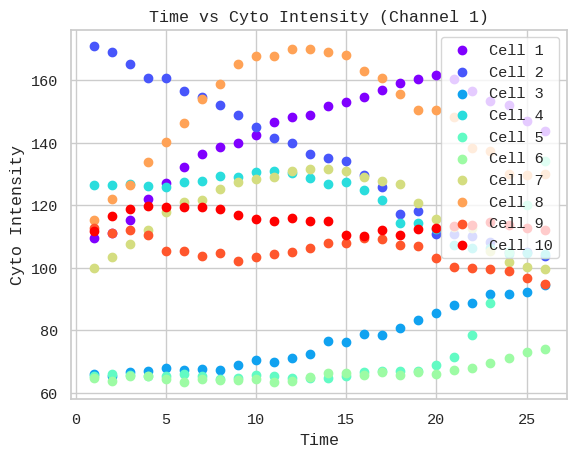

In [ ]:
#@title  Make various plots to visualize your data.  
# Try to present different features of your data in different ways to 
# help the user to understand the similarities and heterogeneities encountered 
# in your data sets.

df_data=WT
df_data=df_data.rename(columns={"Unnamed: 0":"Cell Number"})
df_data = df_data[df_data['Cell_Id'].str.contains('rep1_FOV1_')]
max_cell_number=np.max(df_data["Cell Number"])
df_cell_number=df_data["Cell Number"].astype(str)
color = iter(cm.rainbow(np.linspace(0, 1, 10)))

#plot of cells in FOV1 cyto vs time
for cell_number in range(0,10):
  #df_data["Wanted Cell Number"]=df_cell_number.str.contains('cell_number')
  #df_data_plot=df_data.loc[df_data['Wanted Cell Number'] == True]
  df_data_plot=df_data.loc[df_data['Cell Number'] == cell_number]
  df_cell_area=df_data_plot['Cell_Area']
  df_time=df_data_plot['Time']
  df_nuc_intensity_0=df_data_plot['Nuc_Intensity_0']
  df_cyto_intensity_1=df_data_plot['Cyto_Intensity_1'] #correlates to protein concentration
  c = next(color)
  plt.scatter(df_time,df_cyto_intensity_1,c=c,label="Cell " +str(cell_number+1))
  plt.title("Time vs Cyto Intensity (Channel 1)")
  plt.xlabel("Time")
  plt.ylabel("Cyto Intensity")
  plt.legend(loc='upper right')

In [ ]:
def avg_intensity_plot(drug_list,name_list):
  for drug_count in range(0,len(drug_list)):
    df_data = drug_list[drug_count]
    df_data=df_data.rename(columns={"Unnamed: 0":"Cell Number"})
    columns_List=df_data.columns.values
    df_data_plot=[]

    for cell_index in range(0,len(df_data["Cell_Id"])):
      string=df_data["Cell_Id"][cell_index] #for i in range (0,len(cell_Id)), can run through all Id's to check if they have the 
      string=string[8:]
      df_data_plot.append(df_data.loc[df_data['Cell_Id'].str.contains(string)])
    df_data_plot = pd.concat(df_data_plot)
    df_data_plot=df_data_plot.drop_duplicates()
    df_data_plot=df_data_plot.reset_index()

    #remove take only middle string from cell_id aka FOVN
    for cell_index in range(0,len(df_data["Cell_Id"])):
      string=df_data_plot["Cell_Id"][cell_index]
      if len(string)<14:
        df_data_plot["Cell_Id"][cell_index]=string[5:-4]
      else:
        df_data_plot["Cell_Id"][cell_index]=string[5:-5]

    grouped_df=df_data_plot.groupby(["Cell_Id","Time"])
    cell_id=["FOV1","FOV2","FOV3","FOV4","FOV5","FOV6","FOV7","FOV8",]
    numbers = [float(x) for x in range(1, 27)]
    time=numbers
    color = ["red","orange","yellow","green","cyan","blue","purple","black"]
    marker_shapes=['o','^',"*","p"]

    for j in range(0,len(cell_id)):
      for i in range(0,len(time)):
        FOV=cell_id[j]
        hour=time[i]
        avg_cyto=(grouped_df.get_group((FOV,hour)))
        cyto_group=grouped_df.get_group((FOV,hour))
        avg_cyto_value=np.mean(cyto_group["Cyto_Intensity_1"])
        #print("For "+ str(FOV)+", the average intensity is " +str(avg_cyto_value)+"the time is " +str(hour))
        plot=plt.scatter(hour,avg_cyto_value,c=color[j],label=FOV,marker_style=marker_shapes[drug_count])
        #label="_nolegend_"
        plt.set_xlabel("Time")
        plt.set_ylabel("Cyto Intensity")
        handles, labels = plt.gca().get_legend_handles_labels()
        by_label = dict(zip(labels, handles)) 
        plt.legend(by_label.values(), by_label.keys(),loc="upper right")
        plt.set_title("Average Intensity of All Cells for Each FOV versus Time for "+name_list[drug_count])
  return plot

AttributeError: ignored

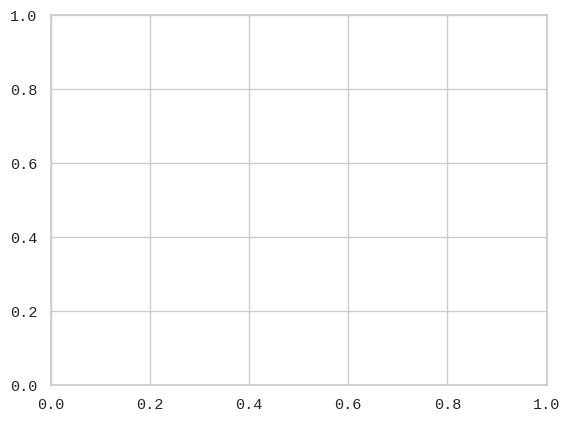

In [ ]:
y_wt = range(0,wt_diff.shape[0])
y_d1 = range(0,d1_diff.shape[0])
y_d5 = range(0,d5_diff.shape[0])
y_d7 = range(0,d7_diff.shape[0])
fig, ax = plt.subplots(2,2)
ax[0,0].scatter(y_wt, wt_diff)
ax[0,0].set_title('WT Diff in F-I Intensity')

ax[1,0].scatter(y_d1, d1_diff)
ax[1,0].set_title('D1 Diff in F-I Intensity')

ax[0,1].scatter(y_d5, d5_diff)
ax[0,1].set_title('D5 Diff in F-I Intensity')

ax[1,1].scatter(y_d7, d7_diff)
ax[1,1].set_title('D7 Diff in F-I Intensity')

In [ ]:
#@title Find which features are significantly affected by your drug.
# For each combination of drug  condition, compute the difference in
# features and estimate the statistical significance of these differences.
# Consider different approaches to calculate the significance and provide
# an argument for why you chose the one you decided to choose.
#@title  Download and open the CSV that contains the data 
# Create different objects for each of your different drug conditions.




path = '/content/drive/My Drive/UQBioProcessedImageData/'

dwt = pd.read_csv(path + 'WT_img_process_data.csv')
d1 = pd.read_csv(path + 'Drug1_img_process_data.csv')
d5 = pd.read_csv(path + 'Drug5_img_process_data.csv')
d7 = pd.read_csv(path + 'Drug7_img_process_data.csv')


def intensity_diff(d):
  d_gr = d.groupby(['Cell_Id'])
  intensity_diff = pd.DataFrame({'Cell_Id': d['Cell_Id'].unique(), 'Difference': np.zeros(len(d['Cell_Id'].unique()))})
  for cell in intensity_diff['Cell_Id']:
    intensity_start = int(d_gr.get_group(cell)[d_gr.get_group(cell)['Time'] == 1.0]['Nuc_Intensity_0'])
    intensity_end = int(d_gr.get_group(cell)[d_gr.get_group(cell)['Time'] == 26.0]['Nuc_Intensity_0'])
    intensity_diff.loc[cell, 'Difference'] = intensity_end - intensity_start
  return intensity_diff['Difference']

wt_diff = intensity_diff(dwt)
d1_diff = intensity_diff(d1)
d5_diff = intensity_diff(d5)
d7_diff = intensity_diff(d7)

print("WT mean difference: ", wt_diff.mean())
print("\nDrug1 mean difference: ", d1_diff.mean())
t_stat, p_value = ttest_ind(intensity_diff(dwt), intensity_diff(d1))
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

print("\nDrug5 mean difference: ", d5_diff.mean())
t_stat, p_value = ttest_ind(intensity_diff(dwt), intensity_diff(d5))
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)

print("\nDrug7 mean difference: ", d7_diff.mean())
t_stat, p_value = ttest_ind(intensity_diff(dwt), intensity_diff(d7))
print("T-statistic value: ", t_stat)  
print("P-Value: ", p_value)




FileNotFoundError: ignored

In [ ]:
class LongBoard:
  def __init__(self, length, color, flex)
    self.length = length
    self.color = color
    self.flex = flex

  def RollDownHill(speed)
    print("woo look at me rolling down a hill in my " + length + " meter, " + self.color + " longboard!")

length = 5
color = 'blue'
flex = False
kyle = LongBoard(len, col, f)

In [ ]:
#@title Rank your 3 drugs 
# Make a series of plots first to rank your drugs based on their
# effects and then to select your favorite.  Make a presentation
# of your results.


In [ ]:
#@title Now write a re-usable function to do prliminary drug selection.
# This file should take as input the (1) a list of names of two or more CSV files 
#   corresponding to Drug0, Drug1, ... (2) a list of a specific comparisions that
#   the user may wish to compute as strings(e.g., 'Mean_Vitality', 
#   'Mean_Effectiveness', etc...).
# It should return two or more matrices (e.g., M_Vitality(I,J), 
#   M_Effectiveness(I,J), ...) of one-to-one comparisions for every drug pair. 
#   Each matrix should be carefully described in the documentation of your
#   function.
# It should also return two or more significance matrixes (e.g., P_Vitality(I,J),
#   P_Effectiveness(I,J), etc...) that present the statistical significance of
#   the presented comparisons.


def chi2_vitality(df1, df2):

  df1_sub = df1[["Cell_Id", "is_cell_vital"]]
  df2_sub = df2[["Cell_Id", "is_cell_vital"]]

  d1_vital = df1_sub.groupby("Cell_Id").min()
  d2_vital = df2_sub.groupby("Cell_Id").min()

  arr1 = [sum(d1_vital["is_cell_vital"]), d1_vital.shape[0] - sum(d1_vital["is_cell_vital"])]
  arr2 = [sum(d2_vital["is_cell_vital"]), d2_vital.shape[0] - sum(d2_vital["is_cell_vital"])]

  prop1 = sum(d1_vital["is_cell_vital"])/d1_vital.shape[0]
  prop2 = sum(d2_vital["is_cell_vital"])/d2_vital.shape[0]

  vitality_df = pd.DataFrame((arr1, arr2))

  c, p, dof, expected = chi2_contingency(vitality_df)

  diff = prop2 - prop1

  return diff, p

def comp_intensity(df1, df2):

  diff1 = intensity_diff(df1)
  diff2 = intensity_diff(df2)

  t_stat, p_value = ttest_ind(diff1, diff2)

  return np.mean(diff2) - np.mean(diff1), p_value


def intensity_diff(d):
  d_gr = d.groupby(['Cell_Id'])
  intensity_diff = pd.DataFrame({'Cell_Id': d['Cell_Id'].unique(), 'Difference': np.zeros(len(d['Cell_Id'].unique()))})
  for cell in intensity_diff['Cell_Id']:
    intensity_start = int(d_gr.get_group(cell)[d_gr.get_group(cell)['Time'] == 1.0]['Cyto_Intensity_1'])
    intensity_end = int(d_gr.get_group(cell)[d_gr.get_group(cell)['Time'] == 26.0]['Cyto_Intensity_1'])
    intensity_diff.loc[cell, 'Difference'] = intensity_end - intensity_start
  return intensity_diff['Difference']


def main(files, comps):
  m_vitality = [[0] * len(files) for _ in range(len(files))]
  p_vitality = [[0] * len(files) for _ in range(len(files))]
  m_cyto_intensity = [[0] * len(files) for _ in range(len(files))]
  p_cyto_intensity = [[0] * len(files) for _ in range(len(files))]
  for i in range(len(files)):
    for j in range(len(files)):
      if i != j and "vitality" in comps:
        diff_vitality, sig_vitality = chi2_vitality(files[i], files[j])
        m_vitality[i][j] = diff_vitality
        p_vitality[i][j] = sig_vitality
      if i != j and "cyto_intensity" in comps:
        diff_cyto_intensity, sig_cyto_intensity = comp_intensity(files[i], files[j])
        m_cyto_intensity[i][j] = diff_cyto_intensity
        p_cyto_intensity[i][j] = sig_cyto_intensity

  results = []

  if "vitality" in comps:
    results.append(m_vitality)
    results.append(p_vitality)
  if "cyto_intensity" in comps:
    results.append(m_cyto_intensity)
    results.append(p_cyto_intensity)
  
  return results




In [ ]:
datasets = [WT, D1, D5, D7]

results = main(datasets, ["vitality", "cyto_intensity"])

for i in results:
  df = pd.DataFrame(i)
  df.columns =['WT', 'D1', 'D5', 'D7']
  print(df)


         WT        D1        D5        D7
0  0.000000 -0.435558 -0.048580 -0.340769
1  0.435558  0.000000  0.386978  0.094789
2  0.048580 -0.386978  0.000000 -0.292189
3  0.340769 -0.094789  0.292189  0.000000
             WT            D1            D5            D7
0  0.000000e+00  2.006117e-19  6.845437e-02  2.711645e-14
1  2.006117e-19  0.000000e+00  4.095951e-14  1.015380e-01
2  6.845437e-02  4.095951e-14  0.000000e+00  1.255136e-09
3  2.711645e-14  1.015380e-01  1.255136e-09  0.000000e+00
          WT         D1         D5         D7
0   0.000000 -19.037188 -13.920501 -15.144875
1  19.037188   0.000000   5.116687   3.892313
2  13.920501  -5.116687   0.000000  -1.224374
3  15.144875  -3.892313   1.224374   0.000000
             WT            D1            D5            D7
0  0.000000e+00  4.168928e-21  4.020824e-14  2.491808e-13
1  4.168928e-21  0.000000e+00  7.099835e-03  6.317857e-02
2  4.020824e-14  7.099835e-03  0.000000e+00  5.359708e-01
3  2.491808e-13  6.317857e-02  5.35970

In [ ]:
#@title (Optional) Combine with image processing notebook.
# Write and document a python function that takes as inputs:
#   (1) a list of folders that contain IMAGES for a particular drug treatment
#   (2) a list of a specific comparisions that the user may wish to compute as 
#       strings(e.g., 'Mean_Vitality', 'Mean_Effectiveness', etc...).
#   (3) a directory to which processed images and data will be stored after 
#       image analysis and statistical analysis
# The function should save to the directory:
#   (1) cell image masks with cells denoted by integers 1, 2, 3,...
#   (2) cell nucleus masks with cells denoted by integers 1, 2, 3,...
#   (3) a CSV file with the locations of all spots and the cell number of that spot
#   (4) a CSV file with the locations and intensities of transcription sites
#   (5) a CSV file with all information requested in Drug Design Stage 1
#   (6) two or more matrices (e.g., M_Vitality(I,J), 
#       M_Effectiveness(I,J), ...) of one-to-one comparisions for every drug pair. 
#       Each matrix should be carefully described in the documentation of your
#       function.
#   (7) It should also return two or more significance matrixes (e.g., P_Vitality(I,J),
#       P_Effectiveness(I,J), etc...) that present the statistical significance of
#       the presented comparisons.